**Gregg Maloy   
Data 621    
Blog I     
A Comparision of the Predicitve Power of an Autoregressive Model versus Simple Linear Model using Non-Hispanic Black Maternal Mortality Rates in the United States between 1999-2019**

**PART I. INTRODUCTION**

*Research Question*    
The purpose of this analysis is to compare the predictive power of a simple linear model versus the predictive power of a simple autoregressive model (lag variable simple linear model) using mean square error (MSE).  More specificaly, data on US Non-Hispanic Black Maternal Mortality Rates(MMR) between 1999-2019 was used to compare predictive power between the models.

*Justification and Relevance*     
It is well documented that maternal mortality, considered a health indicator for the greater population, has increased within recent years, particularly among minority groups.  Health systems throughout the country are tasked with reducing maternal mortality rates.  

*Data Sources*    
The dataset consists of estimated rates of maternal deaths per 100,000 live births across all 50 states.  It is imporatant to emphasize that the MMR's in the dataset are estimates, as the collection of standardized and comparable maternal mortality data remains a challenge due, in part, to lack of standarized data collection. Data is available via 'The Institute for Health Metrics and Evalulation' website, which is affilated with the University of Washington.   
Dataset: https://ghdx.healthdata.org/record/ihme-data/united-states-maternal-mortality-by-state-race-ethnicity-1999-2019

**PART II. DATA INSPECTION & WRANGLING**   

*Data Inspection*   
Data is loaded into a dataframe from a CSV file using pandas. 
The dataframe has 5901 rows long with 15 columns/variables.   

Variables include:    
- measure_id - A numerical identifier for the 'Maternal Mortality Ratio' measure.        
- measure_name - Each value in this column is 'Maternal Mortality Ratio'.   
- location_id - A numerical location identifier.	   
- location_name - State, Region or National.   
- race_group - Maternal race/ethnic grouping.   
- sex_id - Gender numerical identifier.   
- sex_name - Gender.   
- age_group_id - Maternal age numerical group.   
- age_group_name - Maternal age group.   
- year_id	metric_id - Year.    
- metric_name - Each value in this column is 'Rate'.  
- val - Estimated MMR.	   
- lower - Lower Confidence Interval.   
- upper - Upper Confidence Interval.

Data Inspection Notes
- Variables are encoded to proper data types and include 5 ints, 4 floats, and 6 objects.   
- Information produced by df.describe() was not entirely accurate, as the dataset would need to be tidied for calculations to be relevant.   
- Maternal mortality data is available for 21 years (1999- 2019).   
- Data is available for 50 states, the District of Columbia, as well as 4 census regions and 1 national region.   
- The only null/nan values in the data frame are in column 'location_id', which has 420 null/nan values.   
- Variables of interest for this analysis will be 'location_name', 'year_id', 'race_group', and 'val' (maternal mortality ratio) rate, which is defined as the number of maternal deaths per 100,000 live births.
- Finally the dataframe is filtered to only where 'location_name'='national', as this analysis is only interested on national statistics and will not drill down to state level data.
- The final dataframe has 105 rows and 5 columns: location_name, state_abbreviation, year_id, race_group and val (maternal mortality ratio).

In [457]:
#Importing libraries and loading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
url = 'https://raw.githubusercontent.com/greggmaloy/Data_602/main/Data_602_final_maternal_mortality_ratio_US.csv'
data = pd.read_csv(url)
data.head(3)

,measure_id,measure_name,location_id,location_name,race_group,sex_id,sex_name,age_group_id,age_group_name,year_id,metric_id,metric_name,val,lower,upper
0,25,Maternal mortality ratio,523.0,Alabama,Hispanic and any race,2,Female,169,10 to 54,1999,3,Rate,7.054950,3.074580,16.177776
1,25,Maternal mortality ratio,523.0,Alabama,Hispanic and any race,2,Female,169,10 to 54,2000,3,Rate,6.854802,2.409957,18.109539
2,25,Maternal mortality ratio,523.0,Alabama,Hispanic and any race,2,Female,169,10 to 54,2001,3,Rate,7.071387,2.085136,21.455477


In [458]:
#The dataframe is 5901 rows long with 15 columns.
#Variables are encoded to proper data type and include 5 ints, 4 floats, and 6 objects.
#these values are not relevant, as the dataset is not tidied and aggregate counts therefore inaccurate
#Check whether only numeric values are present in numeric columns
#these are all the years included in the dataset
#these are all the 'locations' in the dataset - 50 states, the district of columbia, 4 census regions, and one national region
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measure_id      5901 non-null   int64  
 1   measure_name    5901 non-null   object 
 2   location_id     5481 non-null   float64
 3   location_name   5901 non-null   object 
 4   race_group      5901 non-null   object 
 5   sex_id          5901 non-null   int64  
 6   sex_name        5901 non-null   object 
 7   age_group_id    5901 non-null   int64  
 8   age_group_name  5901 non-null   object 
 9   year_id         5901 non-null   int64  
 10  metric_id       5901 non-null   int64  
 11  metric_name     5901 non-null   object 
 12  val             5901 non-null   float64
 13  lower           5901 non-null   float64
 14  upper           5901 non-null   float64
dtypes: float64(4), int64(5), object(6)
memory usage: 691.6+ KB


In [459]:
#these values are not relevant, as the dataset is not tidied and aggregate counts therefore inaccurate
df.describe()

,measure_id,location_id,sex_id,age_group_id,year_id,metric_id,val,lower,upper
count,5901.0,5481.000000,5901.0,5901.0,5901.000000,5901.0,5901.000000,5901.000000,5901.000000
mean,25.0,537.747126,2.0,169.0,2009.000000,3.0,25.883291,12.189606,107.417064
std,0.0,68.411987,0.0,0.0,6.055814,0.0,24.849678,13.794055,380.238824
min,25.0,102.000000,2.0,169.0,1999.000000,3.0,0.238959,0.000029,2.990539
25%,25.0,534.000000,2.0,169.0,2004.000000,3.0,10.490341,2.861350,25.498193
50%,25.0,547.000000,2.0,169.0,2009.000000,3.0,18.918142,7.940514,43.065600
75%,25.0,560.000000,2.0,169.0,2014.000000,3.0,32.783255,16.061453,81.377376
max,25.0,573.000000,2.0,169.0,2019.000000,3.0,441.249133,99.669577,9706.025762


In [460]:
null_counts = df.isnull().sum()
print(null_counts)

measure_id          0
measure_name        0
location_id       420
location_name       0
race_group          0
sex_id              0
sex_name            0
age_group_id        0
age_group_name      0
year_id             0
metric_id           0
metric_name         0
val                 0
lower               0
upper               0
dtype: int64


In [461]:
#420 nan values in locaiton_id. this column is not needed for this analysis and therefore we are not concern with this finding
nan_counts = df.isna().sum()
print(nan_counts)

measure_id          0
measure_name        0
location_id       420
location_name       0
race_group          0
sex_id              0
sex_name            0
age_group_id        0
age_group_name      0
year_id             0
metric_id           0
metric_name         0
val                 0
lower               0
upper               0
dtype: int64


In [462]:
#Check whether only numeric values are present in numeric columns
is_numeric_deaths = all(str(value).isnumeric() for value in df['val'])
is_numeric_year = all(str(value).isnumeric() for value in df['year_id'])

is_numeric_deaths
is_numeric_year

True

In [463]:
#number of unique years in dataset
unique_values = df['year_id'].unique()
#these are all the years included in the dataset
print(unique_values)

[1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019]


In [464]:
#number of unqiue locations
unique_values = df['location_name'].unique()
#these are all the 'locations' in the dataset - 50 states, the district of columbia, 4 census regions, and one national region
print(len(unique_values))

56


In [465]:
#unique location names
unique_values = df['location_name'].unique()
#here are all the location_names
print(unique_values)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Midwest Census Region' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'National' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico'
 'New York' 'North Carolina' 'North Dakota' 'Northeast Census Region'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Census Region' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas'
 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Census Region'
 'West Virginia' 'Wisconsin' 'Wyoming']


In [466]:
#filter to only national data
data = df[(df['location_name'] == 'National') & (df['race_group'] == 'Non-Hispanic Black')][['location_name',  'year_id', 'race_group', 'val']]
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 2943 to 3043
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_name  21 non-null     object 
 1   year_id        21 non-null     int64  
 2   race_group     21 non-null     object 
 3   val            21 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 840.0+ bytes


,location_name,year_id,race_group,val
2943,National,1999,Non-Hispanic Black,31.430603
2948,National,2000,Non-Hispanic Black,28.492504
2953,National,2001,Non-Hispanic Black,29.999510
2958,National,2002,Non-Hispanic Black,35.664001
2963,National,2003,Non-Hispanic Black,42.068799
2968,National,2004,Non-Hispanic Black,46.368577
2973,National,2005,Non-Hispanic Black,47.904228
2978,National,2006,Non-Hispanic Black,47.841304
2983,National,2007,Non-Hispanic Black,47.525407
2988,National,2008,Non-Hispanic Black,47.829355


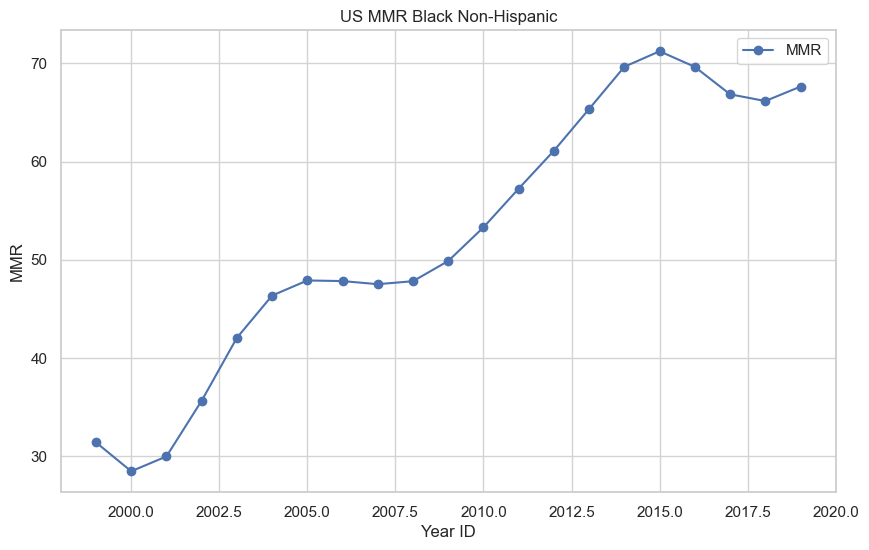

In [467]:
# ensure x and y variable are numeric format
data['year_id'] = pd.to_numeric(df_first['year_id'], errors='coerce')  # Convert to numeric, coerce errors to NaN
data['val'] = pd.to_numeric(df_first['val'], errors='coerce')

#Plot
plt.figure(figsize=(10, 6))
plt.plot(data['year_id'], df_first['val'], label='MMR', marker='o')  
plt.title('US MMR Black Non-Hispanic')
plt.xlabel('Year ID')  
plt.ylabel('MMR')  
plt.legend()
plt.grid(True)
plt.show()

**PART III. AUTOREGRESSIVE MODEL(LAG VARIABLE)**    
In this section, a lag varaible was created to account of the time series nature of the data and then a simple regression model run.  The data was then split into training and testing sets. Values were then predicted using the lag variable. The lag variable value for each year corresponded to the previous year's MMR.

In [468]:
# Creating a lag feature
data['lag_1'] = data['val'].shift(1)

# Drop rows with NaN values created by the shift
data = data.dropna()

# Feature set now includes the lag feature
X = data[['year_id', 'lag_1']]
y = data['val']

# training and test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Linear model
model = LinearRegression()

# training the model
model.fit(X_train, y_train)


print(data[['year_id', 'val', 'lag_1']].head())  # Displays the first few rows

      year_id        val      lag_1
2948     2000  28.492504  31.430603
2953     2001  29.999510  28.492504
2958     2002  35.664001  29.999510
2963     2003  42.068799  35.664001
2968     2004  46.368577  42.068799


In [469]:
# predictions based on test data
y_pred = model.predict(X_test)
y_pred

array([73.87048242, 73.72348638, 72.76684672, 73.22853776])

In [470]:
# MSE 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 35.048618814285454


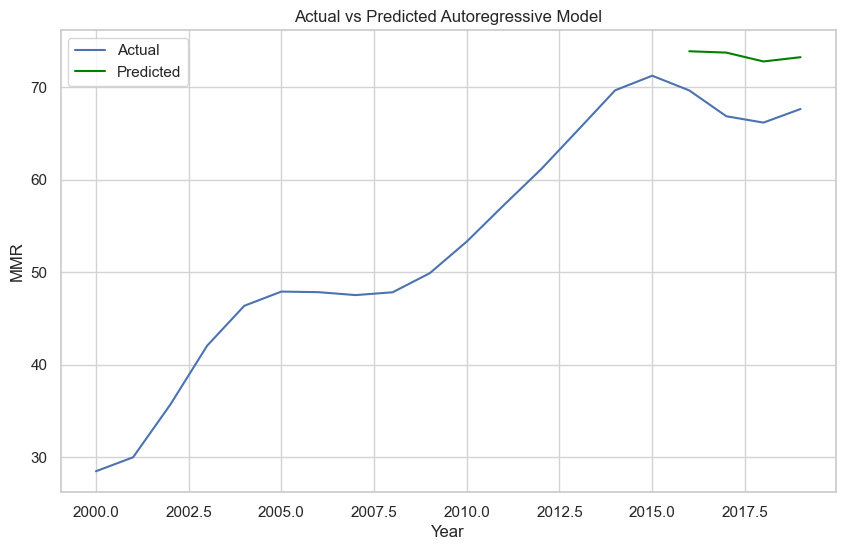

In [471]:
# Plotting the actual vs predicted values 
plt.figure(figsize=(10, 6))
plt.plot(data.year_id, data['val'], label='Actual')
plt.plot(X_test.year_id, y_pred, label='Predicted', color='green')
plt.title('Actual vs Predicted Autoregressive Model')
plt.xlabel('Year')
plt.ylabel('MMR')
plt.legend()
plt.savefig('actual_vs_predicted.png')
plt.show()

**PART IV. SIMPLE REGRESSION(WITHOUT A LAG VARIABLE)**  

Mean Squared Error: 86.1458664378348


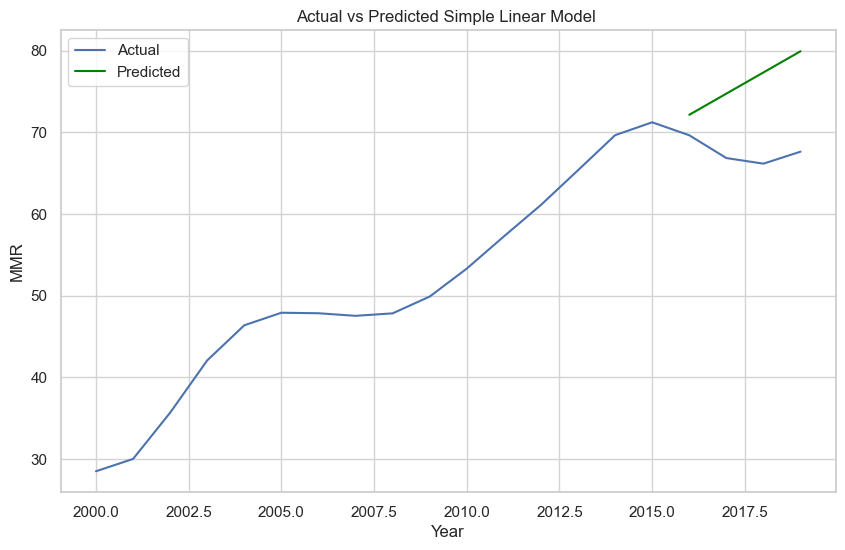

In [473]:
X = data[['year_id']]
y = data['val']

# training and test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# LR model
model = LinearRegression()

# training the model
model.fit(X_train, y_train)
# predictions based on test data
y_pred = model.predict(X_test)
y_pred

# Evaluating using MSE 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotting the actual vs predicted values 
plt.figure(figsize=(10, 6))
plt.plot(data.year_id, data['val'], label='Actual')
plt.plot(X_test.year_id, y_pred, label='Predicted', color='green')
plt.title('Actual vs Predicted Simple Linear Model ')
plt.xlabel('Year')
plt.ylabel('MMR')
plt.legend()
plt.savefig('actual_vs_predicted.png')
plt.show()

**PART V. CONCLUSION**    

The autoregressive model mean square error of 20 means that the error for the predicted MMR varies by approximately 20 MMR unit/deaths for any single observation/data point. Considering the maximum MMR is ~70 and minium MMR is ~25, a mean square error of 20 is quite large.  However, when comparing the mean squared error of the two models (lag variable model=20 vs non-lag variable model=63), introduction of the lag variable demonstrates that the lag variable model more accurately predicts the MMR by MSE.  Of note, the number of oberservations used in this anlaysis was quite small (21) and these results were somewhat expected because of the small sample size.  Next steps would include using this technique on a dataset with more obersvations/values.

In [ ]:
is 